# 1.1 data inladen en manipuleren

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.patches as mpatches


#import data
df=pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

df

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
0,2015-01-02,klant_1,0,0,train
1,2015-01-02,klant_100,0,0,train
2,2015-01-02,klant_101,0,0,train
3,2015-01-02,klant_103,0,0,train
4,2015-01-02,klant_104,0,0,train
...,...,...,...,...,...
505695,2020-04-29,klant_95,68,60,test
505696,2020-04-29,klant_96,0,0,test
505697,2020-04-29,klant_97,66,123,test
505698,2020-04-29,klant_98,2035,2133,test


In [3]:
#klant 153 eruit halen
cust_filter = df['cust_id'] == 'klant_153'
df_filter = df['procesdag'].dt.dayofweek <= 4
data = df.where(df_filter & cust_filter).dropna()
data

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
47,2015-01-02,klant_153,5019.0,0.0,train
827,2015-01-05,klant_153,7699.0,7341.0,train
1087,2015-01-06,klant_153,7341.0,4414.0,train
1347,2015-01-07,klant_153,4414.0,4739.0,train
1607,2015-01-08,klant_153,4739.0,4387.0,train
...,...,...,...,...,...
503927,2020-04-23,klant_153,2988.0,7416.0,test
504187,2020-04-24,klant_153,7416.0,0.0,test
504967,2020-04-27,klant_153,2.0,8256.0,test
505227,2020-04-28,klant_153,8256.0,4951.0,test


# 1.2 plotten data voor overzicht

In [12]:
y = data.aantal_pakketten_volgende_dag
X = data[['procesdag', 'aantal_pakketten']]

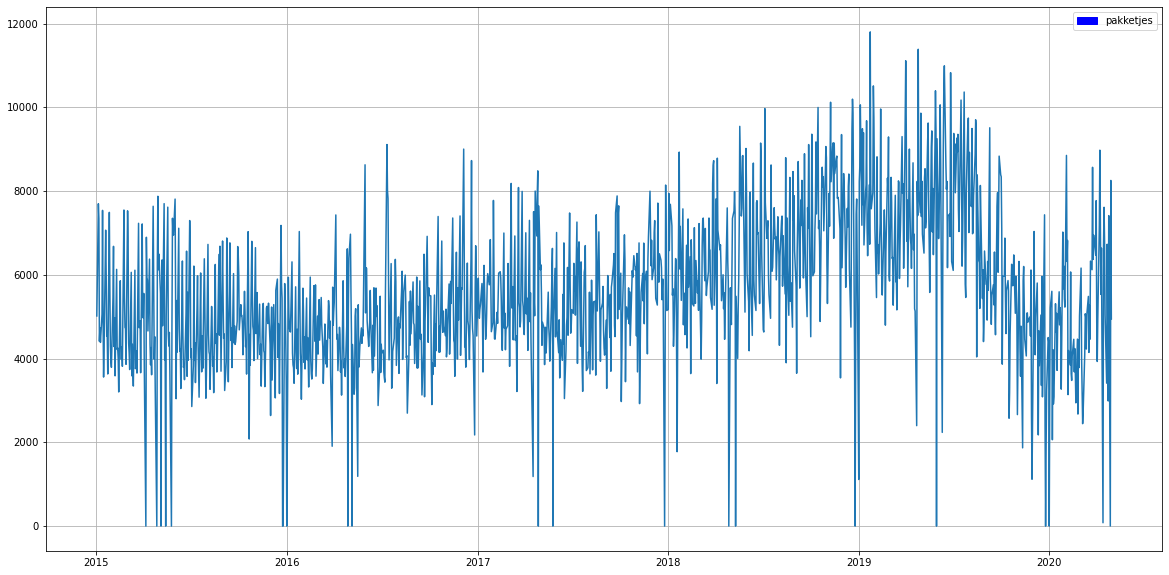

In [13]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.plot(data['procesdag'], data['aantal_pakketten'])
plt.xlabel = ('Procesdag')
plt.ylabel = ('Aantal Pakketten')
plt.title = ('Aantal Pakketten Klant 153')
plt.grid()
blue_patch = mpatches.Patch(color='blue', label='pakketjes')
plt.legend(handles=[blue_patch])
plt.show()

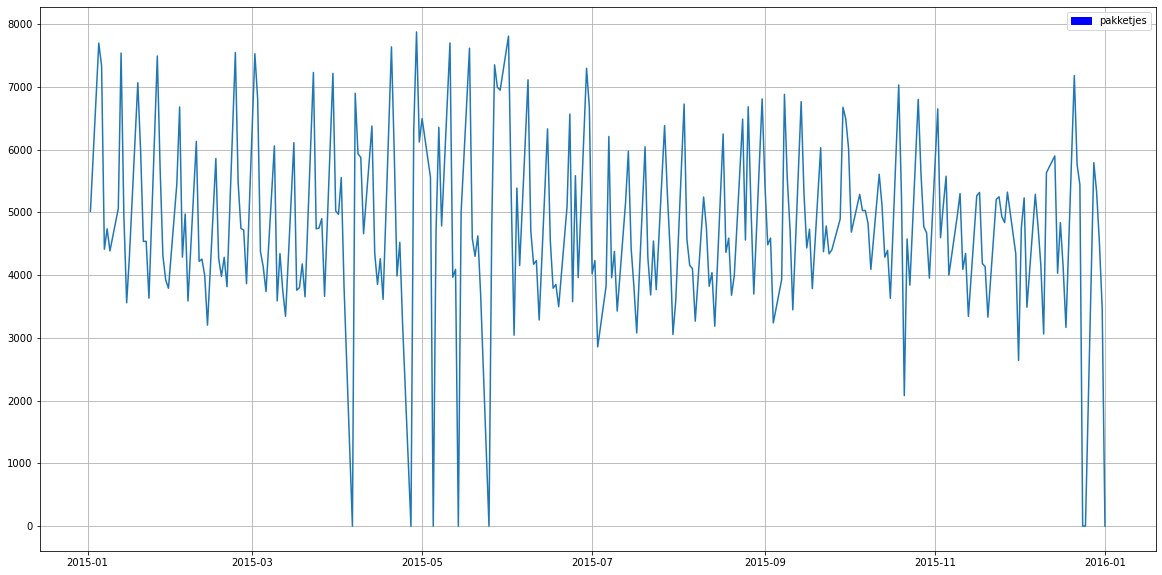

In [6]:
#2015
data = data.set_index(data.procesdag, drop=True)
data_2015 = data['2015-01-01':'2016-01-01']
fig, ax = plt.subplots(figsize = (20, 10))
plt.plot(data_2015['procesdag'], data_2015['aantal_pakketten'])
plt.xlabel = ('Procesdag')
plt.ylabel = ('Aantal Pakketten')
plt.title = ('Aantal Pakketten Klant 153')
plt.grid()
blue_patch = mpatches.Patch(color='blue', label='pakketjes')
plt.legend(handles=[blue_patch])
plt.show()

In [7]:
#conclusie: maand 7 tot en met maand 9 is stabiel

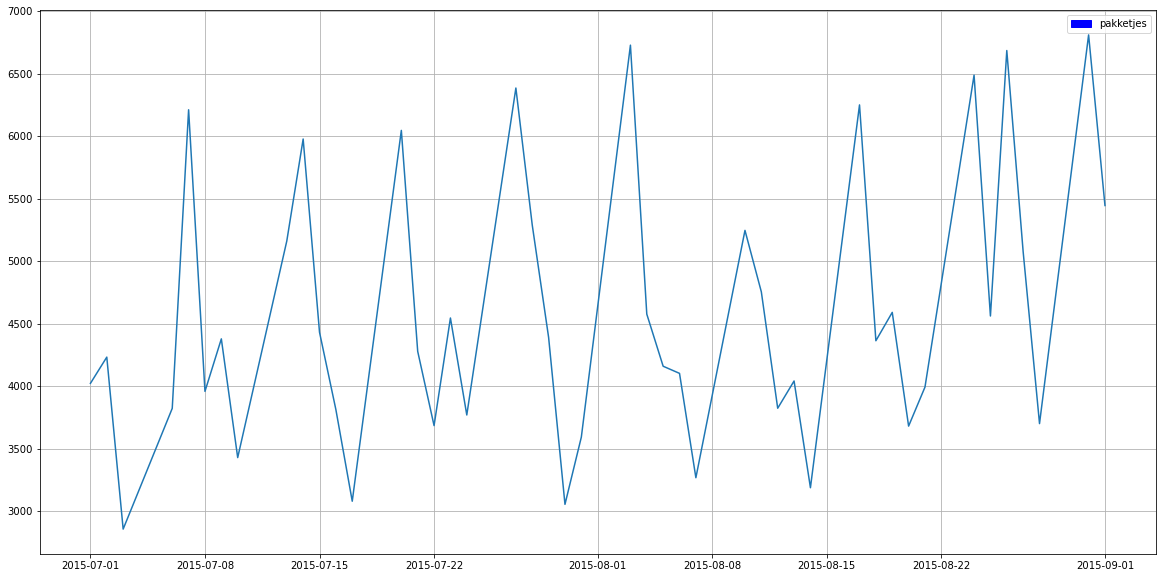

In [8]:
#juli 2015-aug 2015
data_2015_juli_sept = data_2015['2015-07-01':'2015-09-01']
fig, ax = plt.subplots(figsize = (20, 10))
plt.plot(data_2015_juli_sept['procesdag'], data_2015_juli_sept['aantal_pakketten'])
plt.xlabel = ('Procesdag')
plt.ylabel = ('Aantal Pakketten')
plt.title = ('Aantal Pakketten Klant 153')
plt.grid()
blue_patch = mpatches.Patch(color='blue', label='pakketjes')
plt.legend(handles=[blue_patch])
plt.show()

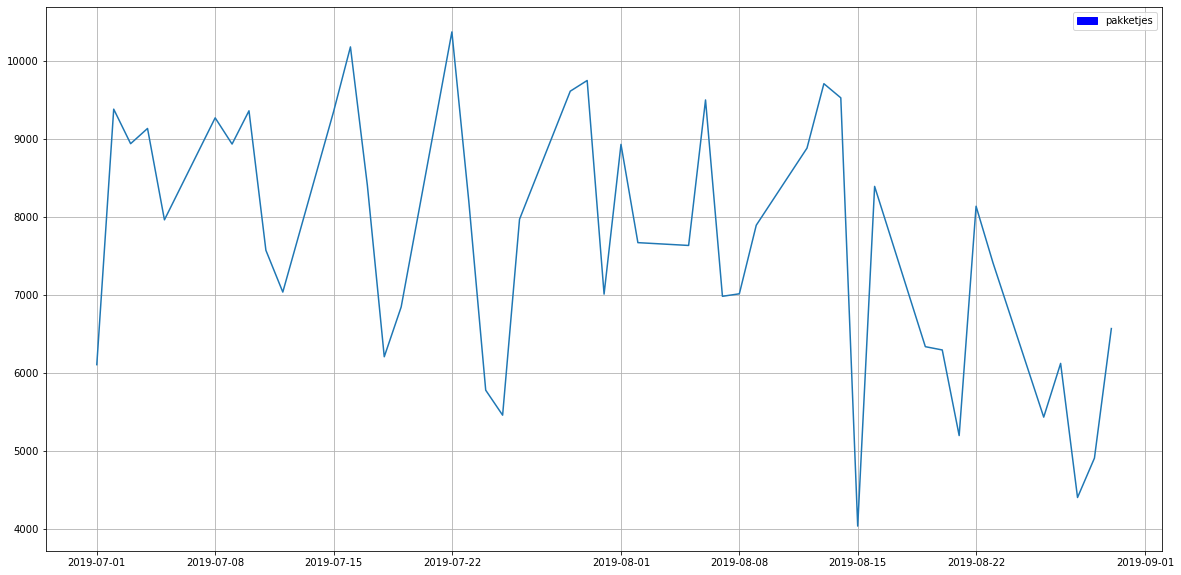

In [9]:
#juli 2019-aug 2019
data = data.set_index(data.procesdag, drop=True)
data_2019 = data['2019-01-01':'2020-01-01']
data_2019_juli_sept = data_2019['2019-07-01':'2019-09-01']
fig, ax = plt.subplots(figsize = (20, 10))
plt.plot(data_2019_juli_sept['procesdag'], data_2019_juli_sept['aantal_pakketten'])
plt.xlabel = ('Procesdag')
plt.ylabel = ('Aantal Pakketten')
plt.title = ('Aantal Pakketten Klant 153')
plt.grid()
blue_patch = mpatches.Patch(color='blue', label='pakketjes')
plt.legend(handles=[blue_patch])
plt.show()
